In [1]:
import utils as u 

2024-04-28 13:47:25.454555: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train, y_train, x_test, y_test = u.load_data(random_seed=2) 

[0 1 1 ... 0 2 0]


In [3]:
# print(x_train)

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3657, 63) (3657,) (915, 63) (915,)


In [5]:
x_train, y_train, x_val, y_val, x_test, y_test = u.preprocess_data(x_train, 
                                                                 y_train, 
                                                                 x_test, 
                                                                 y_test)

In [6]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3292, 63) (3292,) (915, 63) (915,)


In [7]:
print(len(x_train.shape))
print(x_train.max())
print(x_train.min())

print(len(x_test.shape))
print(x_test.max())
print(x_test.min())

2
1.2683395
-0.27441692
2
1.2620145
-0.24090293


In [8]:
model = u.build_model()


In [9]:
history = u.train_model(model, x_train, y_train, x_val, y_val, 
                      epochs=30, batch_size=64)

Epoch 1/30
52/52 [==============================] - 1s 5ms/step - loss: 1.3309 - accuracy: 0.4271 - val_loss: 1.2616 - val_accuracy: 0.6301
Epoch 2/30
52/52 [==============================] - 0s 3ms/step - loss: 1.2038 - accuracy: 0.6674 - val_loss: 1.1299 - val_accuracy: 0.6877
Epoch 3/30
52/52 [==============================] - 0s 3ms/step - loss: 1.0616 - accuracy: 0.7181 - val_loss: 0.9730 - val_accuracy: 0.7808
Epoch 4/30
52/52 [==============================] - 0s 2ms/step - loss: 0.9115 - accuracy: 0.7947 - val_loss: 0.8313 - val_accuracy: 0.8521
Epoch 5/30
52/52 [==============================] - 0s 2ms/step - loss: 0.7782 - accuracy: 0.8426 - val_loss: 0.7034 - val_accuracy: 0.8822
Epoch 6/30
52/52 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.8812 - val_loss: 0.5997 - val_accuracy: 0.9233
Epoch 7/30
52/52 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.9131 - val_loss: 0.5124 - val_accuracy: 0.9479
Epoch 8/30
52/52 [==

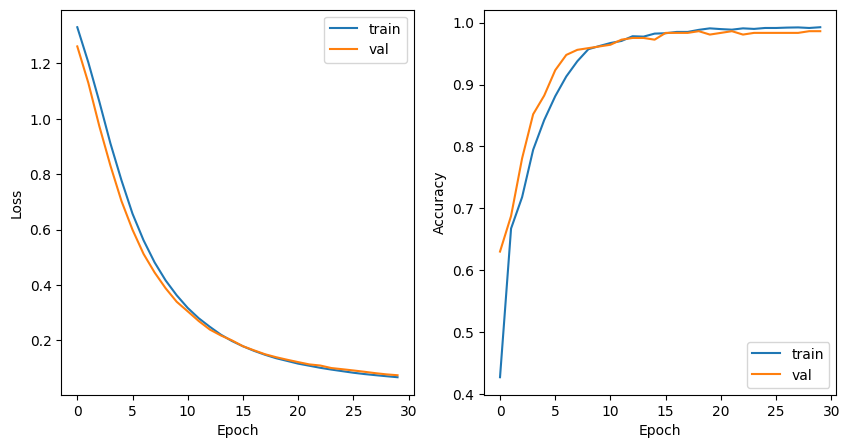

In [10]:
u.plot_loss(history)

In [11]:
test_acc, y_pred = u.test_model(model, x_test, y_test)
print(y_pred)

29/29 [==============================] - 0s 2ms/step
[[9.8629498e-01 6.8304094e-04 1.7914926e-03 1.1230537e-02]
 [2.9068117e-03 9.7366464e-01 2.3399372e-02 2.9112571e-05]
 [9.5130509e-01 3.2983592e-03 1.0078422e-02 3.5318062e-02]
 ...
 [3.5214970e-01 8.2455401e-04 2.6668485e-02 6.2035722e-01]
 [4.5023847e-02 1.5648017e-02 9.3278682e-01 6.5412326e-03]
 [8.4557867e-01 3.4105510e-03 2.7376344e-02 1.2363441e-01]]
29/29 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9923
[0 1 0 2 3 2 1 0 3 0 2 2 3 3 0 3 0 3 0 1 3 0 0 2 0 3 2 3 3 1 3 0 2 0 1 1 1
 3 3 1 0 3 0 3 2 2 3 1 0 1 1 0 2 3 1 1 0 0 0 0 3 2 2 3 2 2 1 0 2 2 1 3 2 0
 3 1 1 2 1 1 3 2 2 0 0 2 2 0 1 0 1 1 2 0 2 1 3 1 0 1 2 3 0 0 0 0 2 3 0 2 0
 1 3 3 0 0 1 0 1 0 3 1 0 2 3 3 2 0 1 2 0 2 2 1 2 0 0 3 1 1 2 1 2 3 0 3 3 0
 2 2 2 3 2 2 1 2 2 2 3 3 3 1 0 3 2 3 1 3 3 2 2 2 3 0 1 0 3 1 1 2 0 1 2 2 0
 0 3 1 3 3 3 0 1 1 2 0 0 3 0 1 3 0 2 0 3 1 0 1 0 1 1 3 3 2 0 3 2 3 3 0 2 2
 2 3 2 2 2 1 2 1 1 0 1 2 2 0 1 0 0 1 2 0 3 2 0 3 1

In [16]:
model.save('./Handpose-Recognition.keras')

In [13]:
print(test_acc)

0.9923497438430786


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2048      
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 2180 (8.52 KB)
Trainable params: 2180 (8.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# %pip install tensorflowjs

In [21]:
!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_graph_model \
    --saved_model_tags=serve \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-TFJS/Week5-Real-Time-Handpose-Recognition/ML/Handpose-Recognition.keras \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-TFJS/Week5-Real-Time-Posture-Recognition/tfjsmodel
